In [72]:
from fastbook import *
from fastai.vision.widgets import *
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *
from pathlib import Path

root = Path().cwd()/"bears"

In [73]:
bear_types = 'grizzly','black','teddy'

In [74]:
if not root.exists():
    root.mkdir()

for o in bear_types:
    dest = (root/o)
    dest.mkdir(exist_ok=True)
    duckduckgo_search(root,dest,f"{o} bear",max_results=200)

Duckduckgo search: grizzly bear


Duckduckgo search: black bear


Duckduckgo search: teddy bear


In [75]:
fns = get_image_files(path)
fns

(#600) [Path('bears/black/001_e82be91d.jpg'),Path('bears/black/002_c16961d8.jpg'),Path('bears/black/003_0a66b0fc.jpg'),Path('bears/black/004_debbdcda.jpg'),Path('bears/black/005_5523a6a4.jpg'),Path('bears/black/006_17ba9205.jpg'),Path('bears/black/007_14c0a3d5.jpg'),Path('bears/black/008_26ed3a3c.jpg'),Path('bears/black/009_8bed9a12.jpg'),Path('bears/black/010_745d00d3.jpg')...]

In [76]:
failed = verify_images(fns)
failed

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [59]:
failed.map(Path.unlink)

(#0) []

In [60]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [61]:
dls = bears.dataloaders(path,num_workers=0)

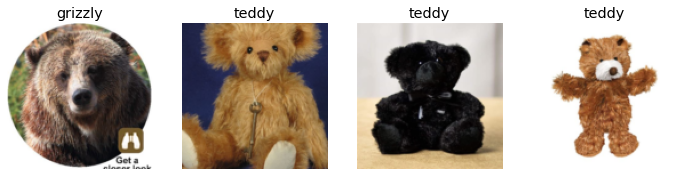

In [62]:
dls.valid.show_batch(max_n=4,nrows=1)

In [63]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.461615,0.532133,0.188889,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.364355,0.542983,0.227778,00:02
1,0.254109,0.457254,0.211111,00:02
2,0.190192,0.474931,0.216667,00:02
3,0.150888,0.488202,0.227778,00:02


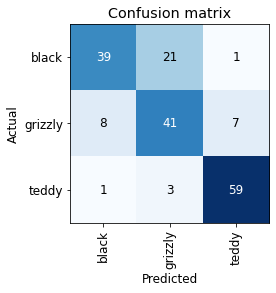

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

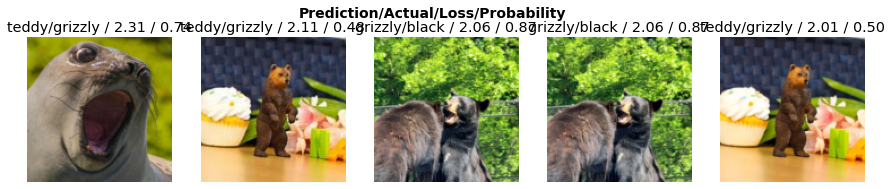

In [66]:
interp.plot_top_losses(5, nrows=1)